**<small>Abstract:</small>**

<small>
We profiled different neuronal classes in C. elegans camt-1 mutants and compared it with the control.  
Overall design: One or more neuronal classes of C. elegans were GFP-labelled at a time. Worms were dissociated.  
Fluorescent cells were FACS-sorted and RNA libraries were established for sequencing.
</small>

**<small>Samples:</small>**

<small>
BAG camt-1 mutant replicates (CAMT-1): SRR13416176, SRR13416177, SRR13416178  
Wild-type replicates (WT): SRR13416172, SRR13416173, SRR13416174
</small>

**<small>Library:</small>**

<small>
Instrument: Illumina HiSeq 4000  
Strategy: RNA-Seq  
Source: TRANSCRIPTOMIC  
Selection: cDNA  
Layout: SINGLE  
Construction protocol: Worms were incubated with lysis buffer containing DTT, then mechanically (pipetting 12 min) and chemically (Pronase) dissociated. GFP+ cells were FACS-sorted.  
NEBNext® Single Cell/Low Input RNA Library Prep Kit for Illumina®
</small>

In [ ]:
# Remove the directory /content/sample_data/ and all of its contents recursively and forcefully
!rm -rf /content/sample_data/

In [ ]:
# Update the list of available packages and their versions
!sudo apt-get update

# Install development libraries required for building packages that depend on:
# - libcurl (for downloading files via HTTPS)
# - libxml2 (for parsing XML)
# - OpenSSL (for secure communication)
# - libz (for compression support)
!sudo apt-get install libcurl4-openssl-dev libxml2-dev libssl-dev libz-dev

# Install htslib development library (required for reading/writing genomic data formats like BAM, CRAM, VCF)
!sudo apt-get install libhts-dev

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

**<small>Install Miniconda</small>**

In [ ]:
%%bash
# Download Miniconda installer script silently (output redirected to /dev/null)
wget https://repo.anaconda.com/miniconda/Miniconda3-py39_4.10.3-Linux-x86_64.sh &>/dev/null

# Make the downloaded installer executable by the user
chmod u+x Miniconda3-py39_4.10.3-Linux-x86_64.sh

# Run the installer in batch mode (-b), forcibly overwrite (-f), and install to /usr/local (-p)
# Output is redirected to /dev/null to keep the notebook clean
./Miniconda3-py39_4.10.3-Linux-x86_64.sh -b -f -p /usr/local &>/dev/null

# Remove the installer script after installation to clean up
rm Miniconda3-py39_4.10.3-Linux-x86_64.sh

**<small>Install the package manager Mamba</small>**

In [ ]:
%%bash
# Install 'mamba' package manager using conda from the conda-forge channel
# The '--yes' flag automatically confirms the installation prompts
conda install -c conda-forge mamba --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bzip2-1.0.8                |       h4bc722e_7         247 KB  conda-forge
    c-ares-1.34.5              |       hb9d3cd8_0         202 KB  conda-forge
    ca-certificates-2025.6.15  |       hbd8a1cb_0         148 KB  conda-forge
    certifi-2025.6.15          |     pyhd8ed1ab_0         152 KB  conda-forge
    cffi-1.17.1                |   py39h15c3d72_0         236 KB  conda-forge
    conda-22.11.1              |   py39hf3d152e_1         904 KB  conda-forge
    cpp-expected-1.1.0         |       hff21bea_1          24 KB  conda-forge
    cryptography-45.0.4        |   py39h7170ec2_0         1.5 MB  conda-forge
    fmt-11.1.4                 |       h07f6e7f_1         187 KB  conda-forge
    krb5-1.21.3   



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [ ]:
%%bash
# Download the latest version of micromamba for Linux-64 and extract only the 'bin/micromamba' binary
wget -qO- https://micromamba.snakepit.net/api/micromamba/linux-64/latest | tar -xvj bin/micromamba

# Create the destination directory for micromamba if it doesn't already exist
mkdir -p /usr/local/micromamba

# Move the extracted micromamba binary to the destination directory
mv bin/micromamba /usr/local/micromamba/

# Clean up by removing the temporary 'bin' directory
rm -r bin

bin/micromamba


In [ ]:
%%bash
# Use micromamba to create a new environment named 'lab11'
# Install the 'salmon' and 'sra-tools' packages from the 'bioconda' and 'conda-forge' channels
/usr/local/micromamba/micromamba create -y -n lab11 -c bioconda -c conda-forge \
    salmon sra-tools



Transaction

  Prefix: /usr/local/envs/lab11

  Updating specs:

   - salmon
   - sra-tools


  Package                           Version  Build                  Channel           Size
────────────────────────────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex                       0.1  conda_forge            conda-forge        3kB
  + _openmp_mutex                       4.5  2_gnu                  conda-forge       24kB
  + boost-cpp                        1.85.0  h3c6214e_4             conda-forge       18kB
  + bzip2                             1.0.8  h4bc722e_7             conda-forge     Cached
  + c-ares                           1.34.5  hb9d3cd8_0             conda-forge     Cached
  + ca-certificates               2025.6.15  hbd8a1cb_0             conda-forge     Cached
  + curl                             8.14.1  h332b0f4_0             c

**<small>Verify whether Salmon will run</small>**

In [ ]:
%%bash
# Set up the micromamba shell integration for bash
# This allows us to use micromamba activate within the script
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the environment named 'lab11'
micromamba activate lab11

# Print the installed version of Salmon to verify it's available and correctly installed
salmon --version

salmon 1.10.3


**<small>Download a reference transcriptome for** ***C.elegans</small>***

In [ ]:
%%bash
# Download the C. elegans reference transcriptome (RNA sequences) in FASTA format
# from the UCSC Genome Browser database and save it as 'c_elegans.fa'
curl https://hgdownload.soe.ucsc.edu/gbdb/ce11/ncbiRefSeq/seqNcbiRefSeq.rna.fa -o c_elegans.fa

# Display the first few lines of the downloaded FASTA file to verify its content
head c_elegans.fa

>NM_001025786.4
TTGTCCTCCTAGAAGGTGTCGTTGTGGAGGGAGGGGAAAACGAGGGCGCCCATATTGTCGGGCGCTCCTTGAATAAAAAA
TCCATACGAGGCGGATCCGGGTATGAACGGGGACGGTTGGCAAGGACCTGGGCGTGGAGGACCACATCACATGAATGGTG
GCGGAGGAGGACGACGTGGTGGAGGTGGTGGTATGCACAATCAAAGAATACAACAGAATCCCCATCATGGTGGAATGAAT
CGTATGATGCCACACGGATTCCGACCACAACAAGGACAATTTATGCCTCAATATCCTCCACCACCACCAATGGGTGGAAT
GCCTGATGTGATGGATATTAATATGCGAATGGATGGTATGTCATTAGGATCGACACCATCAGGAATTCCTGGACAATATG
GTGATATGGGTCCACCGCCAGTCCAACAATGGAATCAACCTGCTCCATTTGTACCTCCACCTCAACAAGACGATCTCTAT
GATCCTTCGGGATATGGTGGTGGAGCTGGTGGTGGTGGAGGACATCATCCATCTCATATGCCACCATATGGACAACGTGG
AAATAATCAGAATCAATACGGGAATCGAATGCAAGGAGGTCAAGGTGGTTATCGAGGGAATCAACAGAGGCAGCAGCAGC
AACAGCCTCAACAGGGATTCAATATGCCACCAATGATGGTTCCACCTGGTCAGCCTCCATTTTATGGTGGAAATCAACCG


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 52.2M  100 52.2M    0     0  64.3M      0 --:--:-- --:--:-- --:--:-- 64.3M


**<small>Create an Salmon index</small>**

In [ ]:
%%bash
# Initialize the micromamba shell hook for bash
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the 'lab11' micromamba environment
micromamba activate lab11

# Create a Salmon index from the C. elegans transcriptome FASTA file
# -t specifies the transcriptome file
# -i specifies the output directory for the index
salmon index -t c_elegans.fa -i c_elegans_index

Threads = 2
Vertex length = 31
Hash functions = 5
Filter size = 536870912
Capacity = 2
Files: 
c_elegans_index/ref_k31_fixed.fa
--------------------------------------------------------------------------------
Round 0, 0:536870912
Pass	Filling	Filtering
1	34	78	
2	5	0
True junctions count = 60279
False junctions count = 290373
Hash table size = 350652
Candidate marks count = 699216
--------------------------------------------------------------------------------
Reallocating bifurcations time: 0
True marks count: 279004
Edges construction time: 7
--------------------------------------------------------------------------------
Distinct junctions = 60279

for info, total work write each  : 2.331    total work inram from level 3 : 4.322  total work raw : 25.000 
Bitarray       161343104  bits (100.00 %)   (array + ranks )
final hash             0  bits (0.00 %) (nb in final hash 0)


Version Server Response: Not Found
index ["c_elegans_index"] did not previously exist  . . . creating it
[2025-07-01 11:21:33.522] [jLog] [warning] The salmon index is being built without any decoy sequences.  It is recommended that decoy sequence (either computed auxiliary decoy sequence or the genome of the organism) be provided during indexing. Further details can be found at https://salmon.readthedocs.io/en/latest/salmon.html#preparing-transcriptome-indices-mapping-based-mode.
[2025-07-01 11:21:33.522] [jLog] [info] building index
out : c_elegans_index
[2025-07-01 11:21:33.522] [puff::index::jointLog] [info] Running fixFasta

[Step 1 of 4] : counting k-mers
[2025-07-01 11:21:34.100] [puff::index::jointLog] [warning] Entry with header [NM_001306788.1], had length less than equal to the k-mer length of 31 (perhaps after poly-A clipping)
[2025-07-01 11:21:34.323] [puff::index::jointLog] [warning] Entry with header [NM_001361712.1], had length less than equal to the k-mer length of 31 

**<small>Confirm that SRA-tools was properly set up</small>**

In [ ]:
%%bash
# Initialize the micromamba shell hook for bash
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the 'lab11' micromamba environment
micromamba activate lab11

# Check and display the installed version of fasterq-dump
fasterq-dump --version


fasterq-dump : 3.2.1



**<small>Download the RNA-Seq reads</small>**

 <small>WT samples</small>

In [ ]:
%%bash
# Load the micromamba shell integration to enable environment activation
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the 'lab11' conda environment previously created
micromamba activate lab11

# Download the raw sequencing data (SRR13416172) from the NCBI SRA database
# The data will be saved in the specified output directory: /content/data/sra_files
prefetch SRR13416172 --output-directory /content/data/sra_files

2025-07-01T11:53:05 prefetch.3.2.1: 1) Resolving 'SRR13416172'...
2025-07-01T11:53:06 prefetch.3.2.1: Current preference is set to retrieve SRA Normalized Format files with full base quality scores
2025-07-01T11:53:06 prefetch.3.2.1: 1) Downloading 'SRR13416172'...
2025-07-01T11:53:06 prefetch.3.2.1:  SRA Normalized Format file is being retrieved
2025-07-01T11:53:06 prefetch.3.2.1:  Downloading via HTTPS...
2025-07-01T11:53:27 prefetch.3.2.1:  HTTPS download succeed
2025-07-01T11:53:31 prefetch.3.2.1:  'SRR13416172' is valid: 847162996 bytes were streamed from 847157306
2025-07-01T11:53:31 prefetch.3.2.1: 1) 'SRR13416172' was downloaded successfully
2025-07-01T11:53:31 prefetch.3.2.1: 1) Resolving 'SRR13416172's dependencies...
2025-07-01T11:53:31 prefetch.3.2.1: 'SRR13416172' has 0 unresolved dependencies


In [ ]:
%%bash
# Load micromamba shell integration to enable environment activation
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the 'lab11' conda environment
micromamba activate lab11

# Download the raw sequencing data for sample SRR13416173
# Save the downloaded file into the specified output directory
prefetch SRR13416173 --output-directory /content/data/sra_files

2025-07-01T11:58:54 prefetch.3.2.1: 1) Resolving 'SRR13416173'...
2025-07-01T11:58:55 prefetch.3.2.1: Current preference is set to retrieve SRA Normalized Format files with full base quality scores
2025-07-01T11:58:55 prefetch.3.2.1: 1) Downloading 'SRR13416173'...
2025-07-01T11:58:55 prefetch.3.2.1:  SRA Normalized Format file is being retrieved
2025-07-01T11:58:55 prefetch.3.2.1:  Downloading via HTTPS...
2025-07-01T11:59:09 prefetch.3.2.1:  HTTPS download succeed
2025-07-01T11:59:11 prefetch.3.2.1:  'SRR13416173' is valid: 642379970 bytes were streamed from 642367187
2025-07-01T11:59:11 prefetch.3.2.1: 1) 'SRR13416173' was downloaded successfully
2025-07-01T11:59:11 prefetch.3.2.1: 1) Resolving 'SRR13416173's dependencies...
2025-07-01T11:59:12 prefetch.3.2.1: 'SRR13416173' has 0 unresolved dependencies


In [ ]:
%%bash
# Load micromamba shell integration to enable environment activation
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the 'lab11' conda environment
micromamba activate lab11

# Download the raw sequencing data for sample SRR13416174
# Save the downloaded file into the specified output directory
prefetch SRR13416174 --output-directory /content/data/sra_files

2025-07-01T12:02:59 prefetch.3.2.1: 1) Resolving 'SRR13416174'...
2025-07-01T12:03:00 prefetch.3.2.1: Current preference is set to retrieve SRA Normalized Format files with full base quality scores
2025-07-01T12:03:00 prefetch.3.2.1: 1) Downloading 'SRR13416174'...
2025-07-01T12:03:00 prefetch.3.2.1:  SRA Normalized Format file is being retrieved
2025-07-01T12:03:00 prefetch.3.2.1:  Downloading via HTTPS...
2025-07-01T12:03:19 prefetch.3.2.1:  HTTPS download succeed
2025-07-01T12:03:21 prefetch.3.2.1:  'SRR13416174' is valid: 690858454 bytes were streamed from 690845347
2025-07-01T12:03:21 prefetch.3.2.1: 1) 'SRR13416174' was downloaded successfully
2025-07-01T12:03:21 prefetch.3.2.1: 1) Resolving 'SRR13416174's dependencies...
2025-07-01T12:03:21 prefetch.3.2.1: 'SRR13416174' has 0 unresolved dependencies


In [ ]:
%%bash
# Load micromamba shell hook to enable environment activation in the current shell
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the 'lab11' conda environment
micromamba activate lab11

# Download sequencing data for sample SRR13416176
# Files will be saved to the specified output directory
prefetch SRR13416176 --output-directory /content/data/sra_files

2025-07-01T12:10:18 prefetch.3.2.1: 1) Resolving 'SRR13416176'...
2025-07-01T12:10:19 prefetch.3.2.1: Current preference is set to retrieve SRA Normalized Format files with full base quality scores
2025-07-01T12:10:19 prefetch.3.2.1: 1) Downloading 'SRR13416176'...
2025-07-01T12:10:19 prefetch.3.2.1:  SRA Normalized Format file is being retrieved
2025-07-01T12:10:19 prefetch.3.2.1:  Downloading via HTTPS...
2025-07-01T12:10:39 prefetch.3.2.1:  HTTPS download succeed
2025-07-01T12:10:41 prefetch.3.2.1:  'SRR13416176' is valid: 685165781 bytes were streamed from 685165427
2025-07-01T12:10:41 prefetch.3.2.1: 1) 'SRR13416176' was downloaded successfully
2025-07-01T12:10:41 prefetch.3.2.1: 1) Resolving 'SRR13416176's dependencies...
2025-07-01T12:10:41 prefetch.3.2.1: 'SRR13416176' has 0 unresolved dependencies


In [ ]:
%%bash
# Load micromamba shell hook to enable environment activation in the current shell
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the 'lab11' conda environment
micromamba activate lab11

# Download sequencing data for sample SRR13416177
# Files will be saved to the specified output directory
prefetch SRR13416177 --output-directory /content/data/sra_files

2025-07-01T12:13:44 prefetch.3.2.1: 1) Resolving 'SRR13416177'...
2025-07-01T12:13:44 prefetch.3.2.1: Current preference is set to retrieve SRA Normalized Format files with full base quality scores
2025-07-01T12:13:45 prefetch.3.2.1: 1) Downloading 'SRR13416177'...
2025-07-01T12:13:45 prefetch.3.2.1:  SRA Normalized Format file is being retrieved
2025-07-01T12:13:45 prefetch.3.2.1:  Downloading via HTTPS...
2025-07-01T12:14:18 prefetch.3.2.1:  HTTPS download succeed
2025-07-01T12:14:20 prefetch.3.2.1:  'SRR13416177' is valid: 664984107 bytes were streamed from 664981029
2025-07-01T12:14:20 prefetch.3.2.1: 1) 'SRR13416177' was downloaded successfully
2025-07-01T12:14:20 prefetch.3.2.1: 1) Resolving 'SRR13416177's dependencies...
2025-07-01T12:14:21 prefetch.3.2.1: 'SRR13416177' has 0 unresolved dependencies


In [ ]:
%%bash
# Load micromamba shell hook to enable environment activation in the current shell
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the 'lab11' conda environment
micromamba activate lab11

# Download sequencing data for sample SRR13416178
# Files will be saved to the specified output directory
prefetch SRR13416178 --output-directory /content/data/sra_files

2025-07-01T12:23:53 prefetch.3.2.1: 1) Resolving 'SRR13416178'...
2025-07-01T12:23:54 prefetch.3.2.1: Current preference is set to retrieve SRA Normalized Format files with full base quality scores
2025-07-01T12:23:54 prefetch.3.2.1: 1) Downloading 'SRR13416178'...
2025-07-01T12:23:54 prefetch.3.2.1:  SRA Normalized Format file is being retrieved
2025-07-01T12:23:54 prefetch.3.2.1:  Downloading via HTTPS...
2025-07-01T12:24:07 prefetch.3.2.1:  HTTPS download succeed
2025-07-01T12:24:08 prefetch.3.2.1:  'SRR13416178' is valid: 420893801 bytes were streamed from 420880953
2025-07-01T12:24:08 prefetch.3.2.1: 1) 'SRR13416178' was downloaded successfully
2025-07-01T12:24:08 prefetch.3.2.1: 1) Resolving 'SRR13416178's dependencies...
2025-07-01T12:24:08 prefetch.3.2.1: 'SRR13416178' has 0 unresolved dependencies


In [ ]:
%%bash
# Define the directory containing SRA files
SRA_DIR="/content/data/sra_files"

# Define the output directory for FASTQ files
OUT_DIR="/content/data/fastq_files"

# Check if SRA_DIR is set and exists; if not, print error and exit
if [[ -z "$SRA_DIR" || ! -d "$SRA_DIR" ]]; then
    echo "Error: SRA_DIR folder is not set or does not exist!"
    exit 1
fi

# Create the output directory if it doesn't exist
mkdir -p "$OUT_DIR"

# Load micromamba shell hook to enable environment activation in the current shell
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the 'lab11' conda environment
micromamba activate lab11

# Find all .sra files inside subdirectories of SRA_DIR and process each file
find "$SRA_DIR" -mindepth 2 -type f -name "*.sra" | while read -r sra_file; do

    # Extract the SRA ID from the filename
    sra_id=$(basename "$sra_file" .sra)
    echo "Converting $sra_id to FASTQ format..."

    # Convert the .sra file to FASTQ format, output to OUT_DIR, force overwrite, use 8 threads
    fasterq-dump "$sra_file" -O "$OUT_DIR" --force --threads 8
done

# Print message when conversion is complete
echo "Conversion completed!"

Converting SRR13416178 to FASTQ format...
Converting SRR13416173 to FASTQ format...
Converting SRR13416177 to FASTQ format...
Converting SRR13416172 to FASTQ format...
Converting SRR13416176 to FASTQ format...
Converting SRR13416174 to FASTQ format...
Conversion completed!


spots read      : 16,634,424
reads read      : 33,268,848
reads written   : 16,634,424
reads 0-length  : 16,634,424
spots read      : 26,937,301
reads read      : 53,874,602
reads written   : 26,937,301
reads 0-length  : 26,937,301
spots read      : 26,993,691
reads read      : 53,987,382
reads written   : 26,993,691
reads 0-length  : 26,993,691
spots read      : 35,100,331
reads read      : 70,200,662
reads written   : 35,100,331
reads 0-length  : 35,100,331
spots read      : 28,187,303
reads read      : 56,374,606
reads written   : 28,187,303
reads 0-length  : 28,187,303
spots read      : 28,380,808
reads read      : 56,761,616
reads written   : 28,380,808
reads 0-length  : 28,380,808


**<small>Quantify transcript expression with `salmon quant`</small>**

In [ ]:
%%bash
# Define the directory containing FASTQ files
FASTQ_DIR="/content/data/fastq_files"

# Define the output directory for quantification results
OUTPUT_DIR="/content/data/quants"

# Load micromamba shell hook to enable environment activation in the current shell
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the 'lab11' conda environment
micromamba activate lab11

# Print the directory being used for FASTQ files
echo "Using FASTQ files directory: $FASTQ_DIR"

# Loop through each FASTQ file in the directory
for file in "$FASTQ_DIR"/*.fastq; do

    # Extract the base filename from the path
    FILENAME="$(basename -- "$file")"
    
    # Remove the file extension to get the sample ID
    ID="${FILENAME%.*}"
    echo "Processing sample $ID"

    # Run salmon quantification on the sample, using the c_elegans_index index,
    # automatic library type detection (-l A), input FASTQ file (-r),
    # validating mappings, running quietly, and outputting to sample-specific folder
    salmon quant -i c_elegans_index -l A -r "$file" --validateMappings --quiet -o "$OUTPUT_DIR/$ID"
done

Using FASTQ files directory: /content/data/fastq_files
Processing sample SRR13416172
Processing sample SRR13416173
Processing sample SRR13416174
Processing sample SRR13416176
Processing sample SRR13416177
Processing sample SRR13416178


Version Server Response: Not Found
-----------------------------------------
| Loading contig table | Time = 50.481 ms
-----------------------------------------
size = 102088
-----------------------------------------
| Loading contig offsets | Time = 6.4989 ms
-----------------------------------------
-----------------------------------------
| Loading reference lengths | Time = 4.1123 ms
-----------------------------------------
-----------------------------------------
| Loading mphf table | Time = 224.12 ms
-----------------------------------------
size = 33854052
Number of ones: 102087
Number of ones per inventory item: 512
Inventory entries filled: 200
-----------------------------------------
| Loading contig boundaries | Time = 116.8 ms
-----------------------------------------
size = 33854052
-----------------------------------------
| Loading sequence | Time = 87.034 ms
-----------------------------------------
size = 30791442
-----------------------------------------
| Loadin

In [ ]:
%%bash
# Define input directory with FASTQ files
FASTQ_DIR="/content/data/fastq_files"

# Define output directory where quantification results will be stored
QUANTS_DIR="/content/data/quants"

# Initialize micromamba shell integration to enable environment activation
eval "$(/usr/local/micromamba/micromamba shell hook --shell=bash)"

# Activate the conda environment named 'lab11' which contains Salmon
micromamba activate lab11

# Loop through each FASTQ file in the input directory
for file in "$FASTQ_DIR"/*.fastq; do

    # Extract the file name (without the full path)
    FILENAME="$(basename -- "$file")"
    
    # Remove the file extension to get the sample ID
    ID="${FILENAME%.*}"

    echo "Processing sample: $ID"

    # Run Salmon quantification:
    # -i specifies the index directory
    # -l A allows automatic library type detection
    # -r specifies the input FASTQ file
    # --validateMappings enables alignment validation
    # --quiet suppresses detailed logging
    # -o specifies the output directory for each sample
    salmon quant -i c_elegans_index -l A -r "$file" --validateMappings --quiet -o "$QUANTS_DIR/$ID"
done

Processing sample: SRR13416172
Processing sample: SRR13416173
Processing sample: SRR13416174
Processing sample: SRR13416176
Processing sample: SRR13416177
Processing sample: SRR13416178


Version Server Response: Not Found
-----------------------------------------
| Loading contig table | Time = 23.003 ms
-----------------------------------------
size = 102088
-----------------------------------------
| Loading contig offsets | Time = 492.23 us
-----------------------------------------
-----------------------------------------
| Loading reference lengths | Time = 342.38 us
-----------------------------------------
-----------------------------------------
| Loading mphf table | Time = 28.274 ms
-----------------------------------------
size = 33854052
Number of ones: 102087
Number of ones per inventory item: 512
Inventory entries filled: 200
-----------------------------------------
| Loading contig boundaries | Time = 74.378 ms
-----------------------------------------
size = 33854052
-----------------------------------------
| Loading sequence | Time = 10.104 ms
-----------------------------------------
size = 30791442
-----------------------------------------
| Loadi

**<small>Differential Expression Analysis</small>**

<small>R Setup and initial package installation<small>

In [ ]:
# Load the R magic extension to enable running R code within Jupyter notebook cells using %%R
%load_ext rpy2.ipython

In [ ]:
%%R
# Check if the BiocManager package is installed
# If not, install it quietly (without too much console output)
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager", quiet = TRUE)

In [ ]:
%%R
# Install the DESeq2 package from Bioconductor if it's not already installed
# 'quiet = TRUE' suppresses unnecessary output, 'ask = FALSE' prevents prompts during installation
BiocManager::install("DESeq2", quiet = TRUE, ask = FALSE)

# Load the DESeq2 library for differential expression analysis of RNA-Seq data
library(DESeq2)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)
Installing package(s) 'BiocVersion', 'DESeq2'
also installing the dependencies ‘formatR’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘MatrixGenerics’, ‘RcppArmadillo’

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: generics

Attaching package: ‘generics’

The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    

In [ ]:
%%R
# Install BiocManager from CRAN (if it's not already installed)
# BiocManager is required to install Bioconductor packages
install.packages("BiocManager")

# Set the Bioconductor version to 3.20 (to ensure compatibility with recent packages)
BiocManager::install(version = "3.21")

# Install the 'tximeta' package from Bioconductor
# 'tximeta' helps import transcript-level quantification data with metadata
# 'ask = FALSE' disables prompts during installation
BiocManager::install("tximeta", ask = FALSE)

# Load the tximeta package into the R environment
library(tximeta)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/BiocManager_1.30.26.tar.gz'
Content type 'application/x-gzip' length 594489 bytes (580 KB)
downloaded 580 KB


The downloaded source packages are in
	‘/tmp/Rtmp5pvSHV/downloaded_packages’
'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)
'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)
Installing package(s) 'tximeta'
also installing the dependencies ‘RCurl’, ‘plogr’, ‘png’, ‘XML’, ‘GenomicAlignments’, ‘restfulr’, ‘lazyeval’, ‘bitops’, ‘Rhts

<small>**Create a metadta R data.frame to label the RNA-Seq `quant.sf` files</small>**

In [ ]:
%%R
# Define the names of the RNA-Seq samples (SRA accession IDs)
sample_names <- c('SRR13416172', 'SRR13416173', 'SRR13416174',
                  'SRR13416176', 'SRR13416177', 'SRR13416178')  # Check these IDs for correctness

# Define the experimental condition/type for each sample
# The first three are 'Control', the next three are 'Mutant'
sample_type <- c('Control', 'Control', 'Control',
                 'Mutant', 'Mutant', 'Mutant')

# Create a metadata data frame with two columns:
# 'ids' for sample names and 'category' for sample types
# stringsAsFactors = FALSE ensures that character columns are not converted to factors
metadata <- data.frame(ids = sample_names,
                       category = sample_type,
                       stringsAsFactors = FALSE)

# Display the resulting metadata table
metadata

          ids category
1 SRR13416172  Control
2 SRR13416173  Control
3 SRR13416174  Control
4 SRR13416176   Mutant
5 SRR13416177   Mutant
6 SRR13416178   Mutant


<small>**Save the absolute path of every `quant.sf` file in a variable called `files`</small>**

In [ ]:
%%R
# Construct the full file paths for each quant.sf file generated by Salmon
# The files are assumed to be located in: /content/data/quants/{sample_id}/quant.sf
files <- paste("/content/data/quants/", metadata$ids, "/quant.sf", sep="")

# Display the constructed file paths to verify correctness
files

[1] "/content/data/quants/SRR13416172/quant.sf"
[2] "/content/data/quants/SRR13416173/quant.sf"
[3] "/content/data/quants/SRR13416174/quant.sf"
[4] "/content/data/quants/SRR13416176/quant.sf"
[5] "/content/data/quants/SRR13416177/quant.sf"
[6] "/content/data/quants/SRR13416178/quant.sf"


**<small>Create an R data.frame containing the above absolute paths, SRA Run IDs, and condition status</small>**

In [ ]:
%%R
# Create a data frame (coldata) that links each sample's quantification file to its corresponding sample ID and experimental condition
coldata <- data.frame(
  files,                    # Full paths to quant.sf files
  names = metadata$ids,     # Sample names/IDs
  condition = metadata$category,  # Experimental condition: 'Control' or 'Mutant'
  stringsAsFactors = FALSE  # Keep strings as character type
)

# Display the constructed coldata to ensure it's correct
coldata

                                      files       names condition
1 /content/data/quants/SRR13416172/quant.sf SRR13416172   Control
2 /content/data/quants/SRR13416173/quant.sf SRR13416173   Control
3 /content/data/quants/SRR13416174/quant.sf SRR13416174   Control
4 /content/data/quants/SRR13416176/quant.sf SRR13416176    Mutant
5 /content/data/quants/SRR13416177/quant.sf SRR13416177    Mutant
6 /content/data/quants/SRR13416178/quant.sf SRR13416178    Mutant


**<small>Use `tximeta`'s core function to convert transcript-level abundances to count matrices and download additional metadata for the `quant.sf` files</small>**

In [ ]:
%%R
# Set the cache directory for BiocFileCache used by tximeta
# This is where annotation and transcript reference data will be stored
setTximetaBFC("/root/.cache/R/BiocFileCache")

# Import the quantification data using tximeta
# - coldata: data frame that links quant.sf files to sample metadata
# - type = "salmon": specify that the data was quantified using Salmon
# - txOut = TRUE: keep transcript-level estimates (not aggregated to gene-level yet)
summarizedExperiment <- tximeta(coldata, type = "salmon", txOut = TRUE)


/root/.cache/R/BiocFileCache
  does not exist, create directory? (yes/no): yes


for group use, set the permissions of this directory to allow group write (g+w)
importing quantifications
reading in files with read_tsv
1 2 3 4 5 6 
couldn't find matching transcriptome, returning non-ranged SummarizedExperiment


In [ ]:
%%R
# Display the summarizedExperiment object
# This object contains:
# - the expression quantifications (assays)
# - sample metadata (colData)
# - transcript metadata (rowData)
# Useful for downstream differential expression analysis
summarizedExperiment

class: SummarizedExperiment 
dim: 53733 6 
metadata(3): tximetaInfo quantInfo countsFromAbundance
assays(3): counts abundance length
rownames(53733): NM_001025786.4 NM_001025787.4 ... NP_006963.1
  NP_006964.1
rowData names(0):
colnames(6): SRR13416172 SRR13416173 ... SRR13416177 SRR13416178
colData names(2): names condition


**<small>Import `summarizedExperiment` into DESeq2 with the DESeqDataSet() function</small>**

In [ ]:
%%R
# Create a DESeq2 dataset object from the summarizedExperiment
# - 'summarizedExperiment' contains the imported quantification data
# - design formula specifies the experimental design (condition variable)
# This object is used for differential expression analysis with DESeq2
dds <- DESeqDataSet(summarizedExperiment, design = ~ condition)

using counts and average transcript lengths from tximeta
In addition: Warning message:
In DESeqDataSet(summarizedExperiment, design = ~condition) :
  some variables in design formula are characters, converting to factors


**<small>Run DESeq2's core function on the DESeqDataSet named `dds`</small>**

In [ ]:
%%R
# Run the DESeq2 differential expression analysis on the dataset
dds <- DESeq(dds)

estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


**<small>Use the `results()` function to extract a results table from the DESeqDataSet</small>**

In [ ]:
%%R
# Extract the results table from the DESeq2 analysis in a tidy format
resultsTable <- results(dds, tidy=TRUE)

# Display the first few rows of the results table
head(resultsTable)

             row   baseMean log2FoldChange     lfcSE       stat       pvalue
1 NM_001025786.4  455.48993      0.6690679 1.6670932  0.4013380 6.881713e-01
2 NM_001025787.4 2719.22727      0.1770420 0.5077183  0.3487011 7.273137e-01
3 NM_001025788.2   13.71750     -0.1510204 1.2940689 -0.1167020 9.070962e-01
4 NM_001025789.2   13.98840      3.8280412 1.6558503  2.3118281 2.078716e-02
5 NM_001025790.1    8.58749      5.4204979 2.6453347  2.0490783 4.045446e-02
6 NM_001025792.4  298.83032      3.4808489 0.6441200  5.4040377 6.515725e-08
          padj
1 9.073074e-01
2 9.222027e-01
3 9.758765e-01
4 1.330387e-01
5 2.126099e-01
6 2.293956e-06


In [ ]:
%%R
# Display the last few rows of the differential expression results table
tail(resultsTable)

              row   baseMean log2FoldChange     lfcSE       stat     pvalue
53728 NP_006959.1 450935.781     -1.0445284 0.8591219 -1.2158093 0.22405757
53729 NP_006960.1  19683.471     -0.2664296 0.8062619 -0.3304504 0.74105965
53730 NP_006961.1 163577.724      0.2303822 0.6909044  0.3334502 0.73879444
53731 NP_006962.1 518609.401     -1.5150969 0.8374788 -1.8091166 0.07043289
53732 NP_006963.1  26170.971     -0.6630580 0.9418399 -0.7040029 0.48143096
53733 NP_006964.1   8160.215     -1.6444713 0.7587322 -2.1673934 0.03020487
           padj
53728 0.5663187
53729 0.9269564
53730 0.9262043
53731 0.3021637
53732 0.8027609
53733 0.1746059


**<small>Download and install the `EnhancedVolcano` package</small>**

In [ ]:
%%R
# Install the EnhancedVolcano package from GitHub quietly (without verbose output)
devtools::install_github('kevinblighe/EnhancedVolcano', quiet = TRUE)

# Load the EnhancedVolcano library for creating volcano plots
library(EnhancedVolcano)

Installing 1 packages: ggrepel
Loading required package: ggplot2
Loading required package: ggrepel


**<small>Download and install the `org.Ce.eg.db` package and convert `ACCNUM` of transcripts to `ENTREZID` and `SYMBOL`</small>**

In [ ]:
%%R
# Install the org.Ce.eg.db package for C. elegans gene annotation
BiocManager::install("org.Ce.eg.db")

# Load necessary libraries for gene annotation and data manipulation
library(org.Ce.eg.db)
library(tidyr)

# Extract accession numbers from the results table
accnum <- data.frame(resultsTable$row)

# Separate accession numbers by the dot '.' delimiter into two parts
accnum <- separate(data = accnum, col = resultsTable.row, into = c("row", "right"), sep = "\\.")

# Keep only the first part of the accession number
accnum <- accnum$row

# Map accession numbers to ENTREZ IDs and gene symbols using the annotation database
mapped <- select(org.Ce.eg.db, accnum, c("ENTREZID","SYMBOL"), "ACCNUM")

# Show the first few rows of the mapped data
head(mapped)

Update all/some/none? [a/s/n]: a
        ACCNUM ENTREZID   SYMBOL
1 NM_001025786   172076    ain-2
2 NM_001025787   172077    xnp-1
3 NM_001025788  3565131 B0205.12
4 NM_001025789   181831   srz-85
5 NM_001025790   181831   srz-85
6 NM_001025792   172270   avr-14


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)
Installing package(s) 'org.Ce.eg.db'
trying URL 'https://bioconductor.org/packages/3.21/data/annotation/src/contrib/org.Ce.eg.db_3.21.0.tar.gz'
Content type 'application/x-gzip' length 19713590 bytes (18.8 MB)
downloaded 18.8 MB


The downloaded source packages are in
	'/tmp/Rtmp5pvSHV/downloaded_packages'
Old packages: 'EnhancedVolcano'
trying URL 'https://bioconductor.org/packages/3.21/bioc/src/contrib/EnhancedVolcano_1.26.0.tar.gz'
Content type 'application/x-gzip' length 10070708 bytes (9.6 MB)
downloaded 9.6 MB


The downloaded source packages are in
	'/tmp/Rtmp5pvSHV/downloaded_packages'
Loading required package: AnnotationDbi


Attaching package: 'tidyr'

The following object is masked from 'package:S4Vectors':

    expan

In [ ]:
%%R
# Check if BiocManager is installed, if not, install it
if (!requireNamespace("BiocManager", quietly = TRUE)) install.packages("BiocManager")

# Force install or update org.Ce.eg.db and AnnotationDbi packages
BiocManager::install(c("org.Ce.eg.db", "AnnotationDbi"), force = TRUE)

# Load required libraries for annotation and data manipulation
library(org.Ce.eg.db)
library(AnnotationDbi)
library(tidyr)

# Create a dataframe from resultsTable$row, fixing column reference
accnum <- data.frame(row = resultsTable$row)

# Separate accession numbers on '.' into two parts and keep the first part
accnum <- separate(data = accnum, col = row, into = c("row", "right"), sep = "\\.")
accnum <- accnum$row

# Map accession numbers to ENTREZID and SYMBOL using the annotation database
mapped <- AnnotationDbi::select(org.Ce.eg.db, keys = accnum,
                                columns = c("ENTREZID", "SYMBOL"), keytype = "ACCNUM")

# Display the first few mapped rows
head(mapped)

        ACCNUM ENTREZID   SYMBOL
1 NM_001025786   172076    ain-2
2 NM_001025787   172077    xnp-1
3 NM_001025788  3565131 B0205.12
4 NM_001025789   181831   srz-85
5 NM_001025790   181831   srz-85
6 NM_001025792   172270   avr-14


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)
Installing package(s) 'org.Ce.eg.db', 'AnnotationDbi'
trying URL 'https://bioconductor.org/packages/3.21/data/annotation/src/contrib/org.Ce.eg.db_3.21.0.tar.gz'
trying URL 'https://bioconductor.org/packages/3.21/bioc/src/contrib/AnnotationDbi_1.70.0.tar.gz'

The downloaded source packages are in
	'/tmp/Rtmp5pvSHV/downloaded_packages'
'select()' returned 1:1 mapping between keys and columns


In [ ]:
%%R
# Combine the original results table with the mapped gene annotation data
results <- cbind(resultsTable, mapped)

# Display the first few rows of the combined results
head(results)

             row   baseMean log2FoldChange     lfcSE       stat       pvalue
1 NM_001025786.4  455.48993      0.6690679 1.6670932  0.4013380 6.881713e-01
2 NM_001025787.4 2719.22727      0.1770420 0.5077183  0.3487011 7.273137e-01
3 NM_001025788.2   13.71750     -0.1510204 1.2940689 -0.1167020 9.070962e-01
4 NM_001025789.2   13.98840      3.8280412 1.6558503  2.3118281 2.078716e-02
5 NM_001025790.1    8.58749      5.4204979 2.6453347  2.0490783 4.045446e-02
6 NM_001025792.4  298.83032      3.4808489 0.6441200  5.4040377 6.515725e-08
          padj       ACCNUM ENTREZID   SYMBOL
1 9.073074e-01 NM_001025786   172076    ain-2
2 9.222027e-01 NM_001025787   172077    xnp-1
3 9.758765e-01 NM_001025788  3565131 B0205.12
4 1.330387e-01 NM_001025789   181831   srz-85
5 2.126099e-01 NM_001025790   181831   srz-85
6 2.293956e-06 NM_001025792   172270   avr-14


**<small>Use the `vst()` function to convert the DESeqDataSet into a DESeqTransform data structure</small>**

In [ ]:
%%R
# Apply variance stabilizing transformation (VST) to the DESeqDataSet 'dds'
# 'blind=FALSE' means the transformation takes the experimental design into account
dst <- vst(dds, blind=FALSE)

# Display the first few rows of the transformed count matrix
head(assay(dst))

               SRR13416172 SRR13416173 SRR13416174 SRR13416176 SRR13416177
NM_001025786.4    8.300599    5.487494    9.830888    7.662698    9.713662
NM_001025787.4   11.292033   11.653499   11.100729   11.849871   11.653137
NM_001025788.2    5.916651    6.463864    6.392467    6.512635    6.276949
NM_001025789.2    5.791511    5.709787    5.822634    5.793405    5.885898
NM_001025790.1    5.487494    5.709787    5.487494    5.840511    5.487494
NM_001025792.4    6.723494    7.336140    6.598880    9.280067    9.439929
               SRR13416178
NM_001025786.4    9.797771
NM_001025787.4   10.974641
NM_001025788.2    5.735272
NM_001025789.2    7.221120
NM_001025790.1    6.916813
NM_001025792.4    9.202363


**<small>Use the `plotPCA` function to make a PCA plot</small>**

using ntop=500 top features by variance
using ntop=500 top features by variance


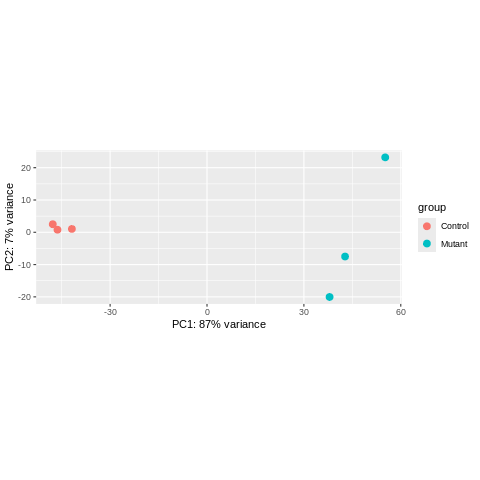

In [ ]:
%%R
# Open a PDF device to save the PCA plot with specified width and height
pdf("PCA.pdf", width = 7, height = 5)

# Create a PCA plot from the dataset 'dst' grouping by the 'condition' variable
plotPCA(dst, intgroup="condition")

# Close the PDF device to finalize and save the file
dev.off()

# Show plot on screen
plotPCA(dst, intgroup="condition")

**<small>Install additional packages</small>**

In [ ]:
%%R
# Install BiocManager if it's not already installed
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

# Install genefilter from Bioconductor
BiocManager::install("genefilter", ask = FALSE)

# Load the package
library(genefilter)

# Install and load gplots (from CRAN)
install.packages("gplots", quiet = TRUE)
library(gplots)

# Install and load RColorBrewer (from CRAN)
install.packages("RColorBrewer", quiet = TRUE)
library(RColorBrewer)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com
Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)
Installing package(s) 'genefilter'
also installing the dependency 'annotate'

trying URL 'https://bioconductor.org/packages/3.21/bioc/src/contrib/annotate_1.86.1.tar.gz'
trying URL 'https://bioconductor.org/packages/3.21/bioc/src/contrib/genefilter_1.90.0.tar.gz'

The downloaded source packages are in
	'/tmp/Rtmp5pvSHV/downloaded_packages'

Attaching package: 'genefilter'

The following objects are masked from 'package:MatrixGenerics':

    rowSds, rowVars

The following objects are masked from 'package:matrixStats':

    rowSds, rowVars

also installing the dependencies 'gtools', 'caTools'


Attaching package: 'gplots'

The following object is masked from 'package:IRanges':

    space

The following object is masked from 'packa

**<small>Select the a certain number of genes with the highest variance between samples</small>**

In [ ]:
%%R
# Select the top 50 most variable genes based on variance across samples
topVarGenes <- head(order(rowVars(assay(dst)), decreasing = TRUE), 50)

**<small>Use the `heatmap.2()` function to plot an expression-level heatmap with hierarchical clustering of the samples<small>**

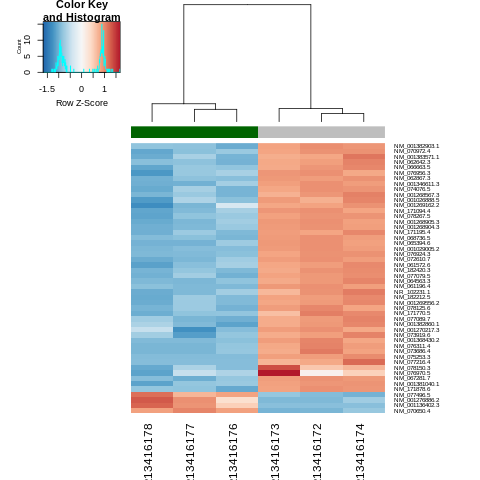

In [ ]:
%%R
# Generate a heatmap of the top 50 most variable genes across samples
# Data is scaled by row for better visualization
heatmap.2(
  assay(dst)[topVarGenes, ],  # Expression matrix subset with top variable genes
  scale = "row",              # Scale expression values by row (gene)
  trace = "none",             # Disable trace lines inside heatmap
  dendrogram = "column",      # Draw dendrogram only for columns (samples)
  margins = c(7, 10),         # Margins for the heatmap
  col = colorRampPalette(rev(brewer.pal(9, "RdBu")))(255),  # Color palette (red-blue)
  ColSideColors = c( Control = "gray", DPN = "darkgreen", OHT = "orange")[colData(dst)$condition]  # Color code samples by condition
)

**<small>Save top 50 expressed genes</small>**

In [ ]:
%%R
# Load the tidyverse package for data manipulation
library(tidyverse)

# Arrange results by p-value and log2 fold change, then select relevant columns
top <- results %>%
  arrange(pvalue, log2FoldChange) %>%
  select(row, ENTREZID, SYMBOL, log2FoldChange, pvalue)

# Extract top 50 genes with smallest p-values and fold changes
top_50 <- top[1:50, ]

# Display the top 50 genes
top_50

# Save the top 50 genes data to a CSV file named 'top_50.csv'
write_csv(top_50, 'top_50.csv')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ dplyr::collapse()     masks IRanges::collapse()
✖ dplyr::combine()      masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()        masks matrixStats::count()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::lag()          masks stats::lag()
✖ ggplot2::Position()   masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()       masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()       masks S4Vectors::rename()
✖ lubridate::second()   masks S4Vectors: